In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tifffile import imread, TiffWriter
import rigidregistration

%matplotlib widget



In [2]:
data_path = '/Users/noahschnitzer/Documents/kem/data/Difficult_RigidRegistration_Datasets/'
outpath =   data_path+'registered/'
dataset = '1639 3.7 Mx HAADF_3.6Mx_100x0.25us_1024px_128mmCL_70umC2_HAADF.tif'
data = imread(data_path+dataset)#+'.tif')
data = np.rollaxis(data,0,3)
data = data[:,:,:40]
print(data.shape)


(1024, 1024, 40)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
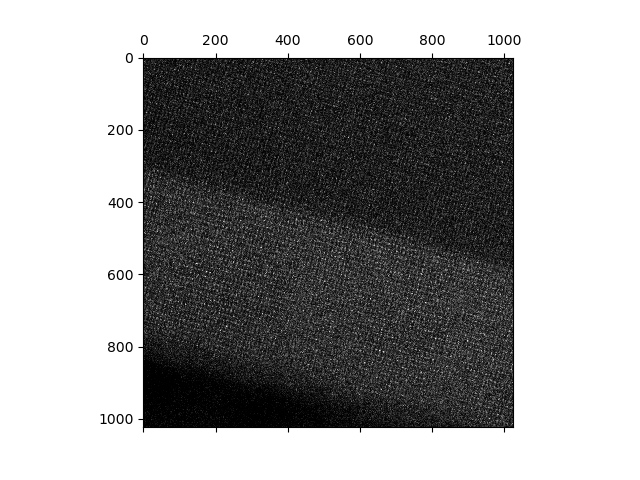

In [3]:
data_slice = data[:,:,18]
fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
ax.matshow(data_slice,cmap='gray')


In [4]:
data = data - np.min(data)
data = data / np.max(data)
#data = np.rollaxis(data,0,3)
data.shape

(1024, 1024, 40)

In [5]:
s=rigidregistration.stackregistration.imstack(data[:,:,:])
s.getFFTs()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
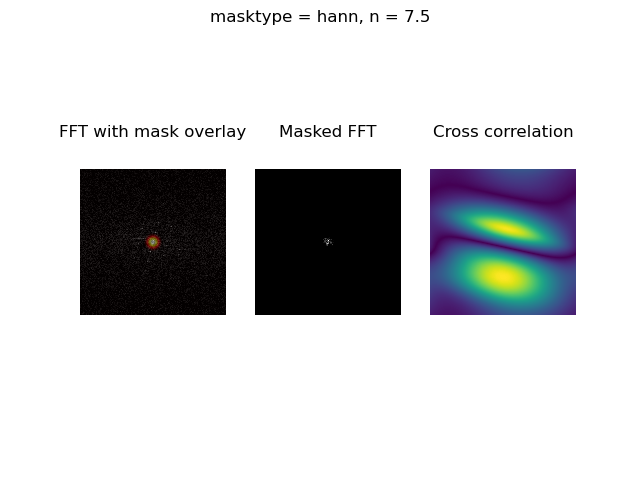

In [11]:
#elliptical
'''
x =6.
n1 = x
n2 = np.sqrt(2)/2*x
theta=-25

s.makeFourierMask_eg(n1=n1,n2=n2,theta=np.radians(theta))   # Set the selected mask
s.show_Fourier_mask(i=5,j=9)                                # Display the results
'''

#isotropic

s.makeFourierMask(mask="hann",n=7.5) #6.5 : 4.60
s.show_Fourier_mask(1,3)

s.assignDualMask(power=3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
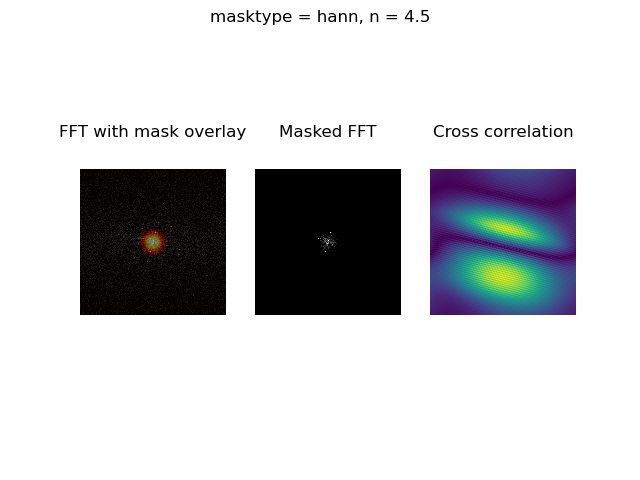

In [12]:
'''x =7.
n1 = x
n2 = .95*x
theta=-25

s.makeFourierMask_eg(n1=n1,n2=n2,theta=np.radians(theta))   # Set the selected mask
s.show_Fourier_mask(i=5,j=9)                                # Display the results
'''
s.makeFourierMask(mask="hann",n=4.5) #6.5 : 4.60
s.show_Fourier_mask(1,3)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
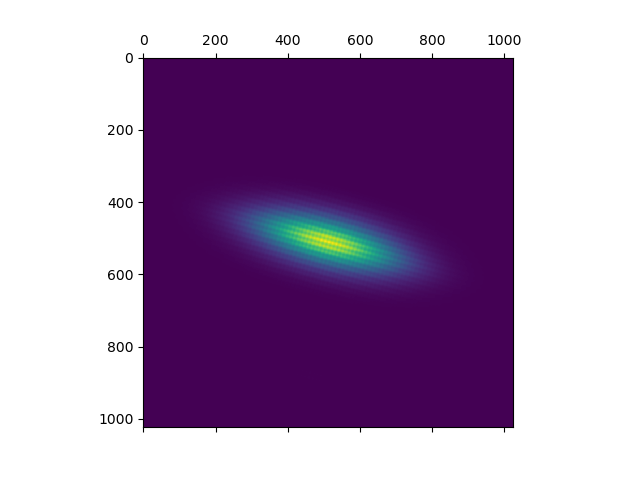

In [13]:
it1 = 1
it2 = 3
#fig,ax = plt.subplots(1,1)
#ax.matshow(np.fft.fftshift(s.getSingleCrossCorrelation_dual(s.fftstack[:,:,it1],s.fftstack[:,:,it2])))
#ax.matshow(s.mask_fourierspace_dual)
fft1 = s.fftstack[:,:,it1]
fft2 = s.fftstack[:,:,it2]

dual_correlation = np.abs(s.fftw.ifft(s.mask_fourierspace_dual * fft2 * np.conj(fft1)))
cross_correlation = np.abs(s.fftw.ifft(s.mask_fourierspace * fft2 * np.conj(fft1)))

fig,ax = plt.subplots(1,1)
ax.matshow(np.fft.fftshift(dual_correlation**3*cross_correlation))

#ax.matshow(np.abs(np.fft.fftshift(np.fft.ifft2(s.mask_fourierspace*s.fftstack[:,:,it1]*np.conj(s.fftstack[:,:,it2])))))

/Users/noahschnitzer/opt/miniconda3/envs/py392/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
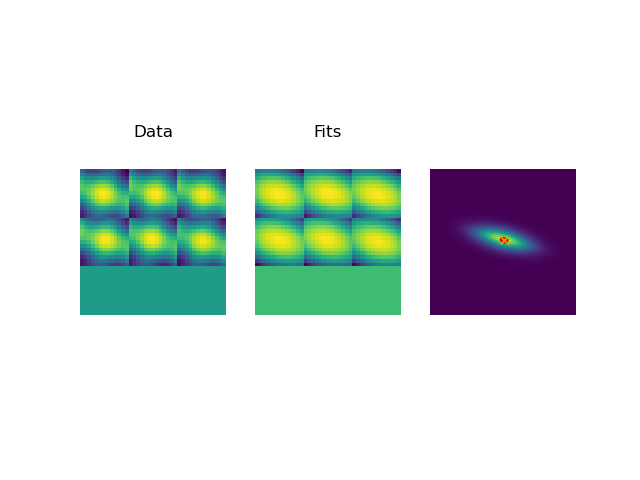

In [14]:
s.setGaussianFitParams(num_peaks=6,sigma_guess=6,window_radius=6)
s.show_Gaussian_fit(2,18,dualMask=True)

In [15]:
t0=time()                                                  # Start time 
findMaxima = 'gf' #'pixel
s.findImageShifts(findMaxima=findMaxima,clippingDimension=None,dualMask = True)     # Find shifts.  Set verbose=True to print the correlation status to screen
t=time()-t0                                                # End time
print("Performed {} correlations in {} minutes {} seconds".format(int(s.nz*(s.nz-1)/2),int(t/60),t%60))


  0%|          | 0/780 [00:00<?, ?it/s]

/Users/noahschnitzer/opt/miniconda3/envs/py392/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Performed 780 correlations in 1 minutes 19.395875930786133 seconds


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
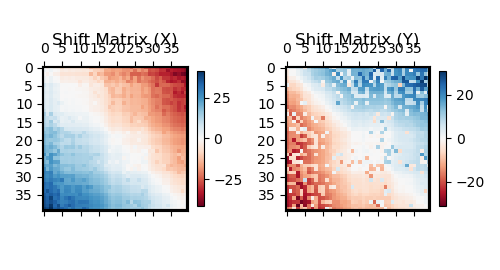

In [16]:
fig = s.show_Rij(returnfig=True,mask=False,colorbars=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
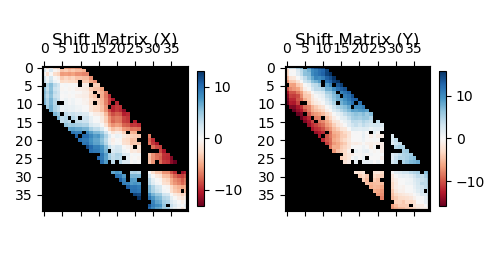

In [32]:
bads = [27,28]#list(range(20,30))
s.set_bad_images(bads)
#s.update_Rij_mask()
s.get_outliers_NN(5)
#s.get_outliers(threshold=5,maxpaths=10)              # Set outlier threshhold
s.mask_off_diagonal(10)
s.refine_mask()
#s.Rij_mask[7,7]=1
fig = s.show_Rij(returnfig=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
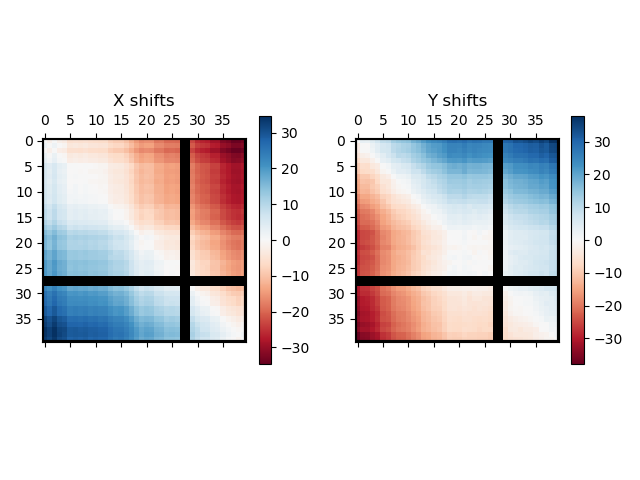

In [33]:
s.make_corrected_Rij()
s.show_Rij_c(colorbars=True)

  0%|          | 0/38 [00:00<?, ?it/s]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
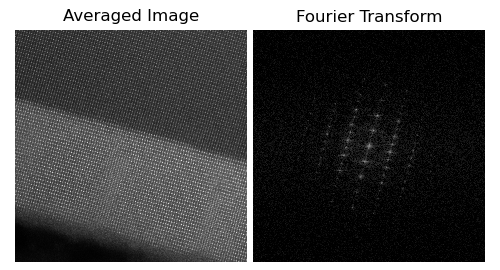

In [34]:
s.get_averaged_image()
s.show() 

In [36]:
#s.show_report()
save_image_path = outpath+"rI_"+dataset+".tif"
s.save(save_image_path)
print(save_image_path)

/Users/noahschnitzer/Documents/kem/data/Difficult_RigidRegistration_Datasets/registered/rI_1639 3.7 Mx HAADF_3.6Mx_100x0.25us_1024px_128mmCL_70umC2_HAADF.tif.tif


In [37]:
save_stack_path = outpath+"rS_"+dataset+".tif"
s.save_registered_stack(save_stack_path,crop=True)
print(save_stack_path)

/Users/noahschnitzer/Documents/kem/data/Difficult_RigidRegistration_Datasets/registered/rS_1639 3.7 Mx HAADF_3.6Mx_100x0.25us_1024px_128mmCL_70umC2_HAADF.tif.tif
